In [1]:
%matplotlib inline

In [37]:
import sys
!{sys.executable} -m pip install imgkit

You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.8/bin/python -m pip install --upgrade pip' command.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import imgkit

In [4]:
diabetesDF = pd.read_csv("/workspace/WorkshopScratchpad/pima-indians-diabetes.csv", names=["timesPregnant", "plasmaGlucose", "bloodPressure", "tricepThickness", "serumInsulin", "bmi", "diabetesPedegree", "age", "label"],header=None)
diabetesDF.head(5)

,timesPregnant,plasmaGlucose,bloodPressure,tricepThickness,serumInsulin,bmi,diabetesPedegree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
diabetesDF.count()

timesPregnant       768
plasmaGlucose       763
bloodPressure       733
tricepThickness     541
serumInsulin        394
bmi                 757
diabetesPedegree    768
age                 768
label               768
dtype: int64

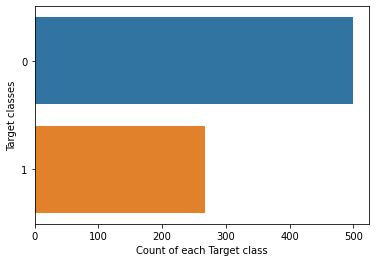

In [5]:
sns.countplot(y=diabetesDF["label"])
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [11]:
diabetesDF['bloodPressure'].value_counts()[0]

35

In [19]:
diabetesDF.isin([0]).sum()

timesPregnant       111
plasmaGlucose         0
bloodPressure         0
tricepThickness       0
serumInsulin          0
bmi                   0
diabetesPedegree      0
age                   0
label               500
dtype: int64

In [16]:
diabetesDF["bloodPressure"] = diabetesDF['bloodPressure'].replace(0,np.nan)
diabetesDF["plasmaGlucose"] = diabetesDF['plasmaGlucose'].replace(0,np.nan)
diabetesDF["tricepThickness"] = diabetesDF['tricepThickness'].replace(0,np.nan)
diabetesDF["serumInsulin"] = diabetesDF['serumInsulin'].replace(0,np.nan)
diabetesDF["bmi"] = diabetesDF['bmi'].replace(0,np.nan)
diabetesDF.head(20)

,timesPregnant,plasmaGlucose,bloodPressure,tricepThickness,serumInsulin,bmi,diabetesPedegree,age,label
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [20]:
diabetesDF.isin([0]).sum()

timesPregnant       111
plasmaGlucose         0
bloodPressure         0
tricepThickness       0
serumInsulin          0
bmi                   0
diabetesPedegree      0
age                   0
label               500
dtype: int64

In [29]:
diabetesDF.count()

timesPregnant       768
plasmaGlucose       763
bloodPressure       768
tricepThickness     541
serumInsulin        394
bmi                 757
diabetesPedegree    768
age                 768
label               768
dtype: int64

In [22]:
cleanedDiabetesDF = diabetesDF.dropna()
cleanedDiabetesDF.count()

timesPregnant       392
plasmaGlucose       392
bloodPressure       392
tricepThickness     392
serumInsulin        392
bmi                 392
diabetesPedegree    392
age                 392
label               392
dtype: int64

In [26]:
cleanedDiabetesDF.to_hdf("/workspace/WorkshopScratchpad/cleaned_pima_indians_diabetes.h5","table")

In [30]:
imputedDiabetesDF = diabetesDF
imputedDiabetesDF.isna().sum()

timesPregnant         0
plasmaGlucose         5
bloodPressure         0
tricepThickness     227
serumInsulin        374
bmi                  11
diabetesPedegree      0
age                   0
label                 0
dtype: int64

In [31]:
imputedDiabetesDF["bloodPressure"] = imputedDiabetesDF["bloodPressure"].fillna(imputedDiabetesDF["bloodPressure"].mean(skipna=True))
imputedDiabetesDF["plasmaGlucose"] = imputedDiabetesDF["plasmaGlucose"].fillna(imputedDiabetesDF["plasmaGlucose"].mean(skipna=True))
imputedDiabetesDF["tricepThickness"] = imputedDiabetesDF["tricepThickness"].fillna(imputedDiabetesDF["tricepThickness"].mean(skipna=True))
imputedDiabetesDF["serumInsulin"] = imputedDiabetesDF["serumInsulin"].fillna(imputedDiabetesDF["serumInsulin"].mean(skipna=True))
imputedDiabetesDF["bmi"] = imputedDiabetesDF["bmi"].fillna(imputedDiabetesDF["bmi"].mean(skipna=True))


In [32]:
imputedDiabetesDF.isna().sum()

timesPregnant       0
plasmaGlucose       0
bloodPressure       0
tricepThickness     0
serumInsulin        0
bmi                 0
diabetesPedegree    0
age                 0
label               0
dtype: int64

In [36]:
with open("/workspace/WorkshopScratchpad/imputed_diabetes.html", "x") as f:
    f.write(imputedDiabetesDF.to_html())

In [39]:
imgkit.from_file('/workspace/WorkshopScratchpad/imputed_diabetes.html', '/workspace/WorkshopScratchpad/imputed_diabetes.jpg')

OSError: 
No wkhtmltoimage executable found: "command not found"
If this file exists please check that this process can read it.
Otherwise please install wkhtmltopdf - http://wkhtmltopdf.org

        